In [7]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
os.getcwd()

'/Users/maxthone/Documents/Personal/Python_Projects/kaggle_housing/scripts'

In [4]:
# go to current directory (actually this is not the best way of doing it, but fine for now)
#os.chdir(os.path.dirname(os.getcwd()))
os.getcwd()

'/Users/maxthone/Documents/Personal/Python_Projects/kaggle_housing'

In [8]:
# Read in the data
df_train = pd.read_csv('data/input_data/train.csv')
#col_list = list(df_train.columns.values)

In [9]:
# Get an idea of how many nulls there are in each column. Columns with too many nulls should probably just be
# removed.
null_dict = {col_name:len(df_train.loc[pd.isnull(df_train[col_name]),:]) for col_name in df_train.columns}

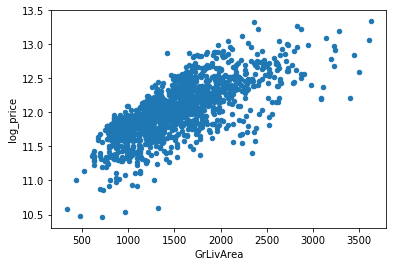

In [10]:
# Add log values (potentially normalises the data)
df_train['log_price'] = np.log(df_train['SalePrice'])
df_train['log_lot_area'] = np.log(df_train['LotArea'])
df_train = df_train.loc[df_train['GrLivArea'] < 4000,:]
df_train.plot(kind = 'scatter',x = 'GrLivArea',y = 'log_price')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10dbc21d0>]],
      dtype=object)

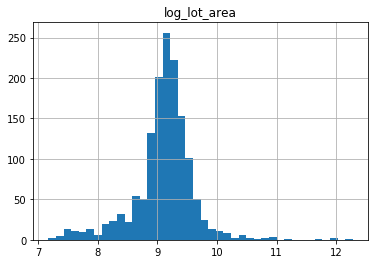

In [25]:
# log transform makes it look normal. Should maybe help in predictions.
df_train.hist('log_lot_area',bins = 40)

In [26]:
# Now let's have a look at neighborhoods.
df_nh = df_train.loc[:,['Neighborhood','SalePrice']]

In [36]:
def f(x):
    d = {}
    d['sales_mean'] = x['SalePrice'].mean()
    d['row_count'] = x['SalePrice'].count()
    return pd.Series(d, index=['sales_mean', 'row_count'])

In [39]:
nb_grp = df_nh.groupby(['Neighborhood']).apply(f).reset_index()

In [51]:
from sklearn.cluster import KMeans

In [49]:
# create for loop that computes KMeans over multiple n_clusters, find the elbow point 
# This isn't necessarily the best method, but for quick and dirty it works.

In [52]:
test_cluster = KMeans(n_clusters=4)

In [55]:
len(nb_grp['sales_mean'])

25

In [57]:
np_sales = np.array(nb_grp['sales_mean'])

In [59]:
np_sales = np_sales.reshape([len(np_sales),1])

In [60]:
nb_grp['cluster_centres'] = test_cluster.fit_predict(
    (np.array(nb_grp['sales_mean'])
     .reshape([len(nb_grp['sales_mean']),1])))

In [69]:
np_array_check = test_cluster.fit_transform((np.array(nb_grp['sales_mean'])
     .reshape([len(nb_grp['sales_mean']),1])))

In [71]:
np_array_check.shape

(25, 4)

In [72]:
model_test = test_cluster.fit((np.array(nb_grp['sales_mean'])
     .reshape([len(nb_grp['sales_mean']),1])))

In [74]:
model_test.predict()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)